# Zona inceta region (ZIR) structural connectivity dataset comparison

## Python Libraries

In [0]:
from __future__ import annotations

from pathlib import Path

import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import seaborn as sns
from tqdm.notebook import trange

## Constants

In [0]:
VOXEL_SZ = 0.7  # mm

COL_LABELS = ["7T", "3T", "3T test"]
ROW_LABELS = ["3T", "3T test", "3T retest"]

MASK = np.zeros_like(np.zeros((3, 3), dtype=bool))
MASK[np.triu_indices_from(MASK, k=1)] = True

## Load data

### 3T

In [0]:
# Left hemi
sorted_dseg = nib.load(
    "../zonaconn-smk_3T/results/diffparc/tpl-MNI152NLin6Asym/tpl-MNI152NLin6Asym_hemi-L_label-ZIR_desc-sorted_from-group_method-spectralcosine_k-6_dseg.nii.gz"
)
seed_3T_affine = sorted_dseg.affine
sorted_dseg = sorted_dseg.get_fdata()
labels_L = sorted_dseg[sorted_dseg > 0] - 1  # Make 0-indexed
data_L = np.load(
    "../zonaconn-smk_3T/results/diffparc/tpl-MNI152NLin6Asym/tpl-MNI152NLin6Asym_hemi-L_label-ZIR_desc-concat_from-group_connMap.npz"
)
mask_L = data_L["mask"]
seed_3Tvol_L = np.zeros(mask_L.shape)
seed_3Tvol_L[mask_L > 0] = labels_L + 1  # add a 1 so label 0 is diff from bg

# Right hemi
sorted_dseg = nib.load(
    "../zonaconn-smk_3T/results/diffparc/tpl-MNI152NLin6Asym/tpl-MNI152NLin6Asym_hemi-R_label-ZIR_desc-sorted_from-group_method-spectralcosine_k-6_dseg.nii.gz"
)
sorted_dseg = sorted_dseg.get_fdata()
labels_R = sorted_dseg[sorted_dseg > 0] - 1  # Make 0-indexed
data_R = np.load(
    "../zonaconn-smk_3T/results/diffparc/tpl-MNI152NLin6Asym/tpl-MNI152NLin6Asym_hemi-R_label-ZIR_desc-concat_from-group_connMap.npz"
)
mask_R = data_R["mask"]
seed_3Tvol_R = np.zeros(mask_R.shape)
seed_3Tvol_R[mask_R > 0] = labels_R + 1  # add a 1 so label 0 is diff from bg

In [0]:
zir_l = nib.load(
    "../zonaconn-smk_3T/results/diffparc/tpl-MNI152NLin6Asym/tpl-MNI152NLin6Asym_hemi-L_label-ZIR_mask.nii.gz"
)
zir_l = zir_l.get_fdata()
print(f"3T Left: {sum(zir_l[zir_l>0])}")

zir_r = nib.load(
    "../zonaconn-smk_3T/results/diffparc/tpl-MNI152NLin6Asym/tpl-MNI152NLin6Asym_hemi-R_label-ZIR_mask.nii.gz"
)
zir_r = zir_r.get_fdata()
print(f"3T Right: {sum(zir_r[zir_r>0])}")

3T Left: 1981.0
3T Right: 1901.0


### 7T

In [0]:
# Left hemi
sorted_dseg = nib.load(
    "../zonaconn-smk_7T/results/diffparc/tpl-MNI152NLin6Asym/tpl-MNI152NLin6Asym_hemi-L_label-ZIR_desc-sorted_from-group_method-spectralcosine_k-6_dseg.nii.gz"
)
seed_7T_affine = sorted_dseg.affine
sorted_dseg = sorted_dseg.get_fdata()
labels_L = sorted_dseg[sorted_dseg > 0] - 1  # Make 0-indexed
data_L = np.load(
    "../zonaconn-smk_7T/results/diffparc/tpl-MNI152NLin6Asym/tpl-MNI152NLin6Asym_hemi-L_label-ZIR_desc-concat_from-group_connMap.npz"
)
mask_L = data_L["mask"]
seed_7Tvol_L = np.zeros(mask_L.shape)
seed_7Tvol_L[mask_L > 0] = labels_L + 1  # add a 1 so label 0 is diff from bg

# Right hemi
sorted_dseg = nib.load(
    "../zonaconn-smk_7T/results/diffparc/tpl-MNI152NLin6Asym/tpl-MNI152NLin6Asym_hemi-R_label-ZIR_desc-sorted_from-group_method-spectralcosine_k-6_dseg.nii.gz"
)
sorted_dseg = sorted_dseg.get_fdata()
labels_R = sorted_dseg[sorted_dseg > 0] - 1  # Make 0-indexed
data_R = np.load(
    "../zonaconn-smk_7T/results/diffparc/tpl-MNI152NLin6Asym/tpl-MNI152NLin6Asym_hemi-R_label-ZIR_desc-concat_from-group_connMap.npz"
)
mask_R = data_R["mask"]
seed_7Tvol_R = np.zeros(mask_R.shape)
seed_7Tvol_R[mask_R > 0] = labels_R + 1  # add a 1 so label 0 is diff from bg

In [0]:
zir_l = nib.load(
    "../zonaconn-smk_7T/results/diffparc/tpl-MNI152NLin6Asym/tpl-MNI152NLin6Asym_hemi-L_label-ZIR_mask.nii.gz"
)
zir_l = zir_l.get_fdata()
print(f"7T Left: {sum(zir_l[zir_l>0])}")

zir_r = nib.load(
    "../zonaconn-smk_7T/results/diffparc/tpl-MNI152NLin6Asym/tpl-MNI152NLin6Asym_hemi-R_label-ZIR_mask.nii.gz"
)
zir_r = zir_r.get_fdata()
print(f"7T Right: {sum(zir_r[zir_r>0])}")

7T Left: 1981.0
7T Right: 1901.0


### Test

In [0]:
# Left hemi
sorted_dseg = nib.load(
    "../zonaconn-smk_testretest/hcp_test/results/diffparc/tpl-MNI152NLin6Asym/tpl-MNI152NLin6Asym_hemi-L_label-ZIR_desc-sorted_from-group_method-spectralcosine_k-6_dseg.nii.gz"
)
seed_Test_affine = sorted_dseg.affine
sorted_dseg = sorted_dseg.get_fdata()
labels_L = sorted_dseg[sorted_dseg > 0] - 1  # Make 0-indexed
data_L = np.load(
    "../zonaconn-smk_testretest/hcp_test/results/diffparc/tpl-MNI152NLin6Asym/tpl-MNI152NLin6Asym_hemi-L_label-ZIR_desc-concat_from-group_connMap.npz"
)
mask_L = data_L["mask"]
seed_Testvol_L = np.zeros(mask_L.shape)
seed_Testvol_L[mask_L > 0] = labels_L + 1  # add a 1 so label 0 is diff from bg

# Right hemi
sorted_dseg = nib.load(
    "../zonaconn-smk_testretest/hcp_test/results/diffparc/tpl-MNI152NLin6Asym/tpl-MNI152NLin6Asym_hemi-R_label-ZIR_desc-sorted_from-group_method-spectralcosine_k-6_dseg.nii.gz"
)
sorted_dseg = sorted_dseg.get_fdata()
labels_R = sorted_dseg[sorted_dseg > 0] - 1  # Make 0-indexed
data_R = np.load(
    "../zonaconn-smk_testretest/hcp_test/results/diffparc/tpl-MNI152NLin6Asym/tpl-MNI152NLin6Asym_hemi-R_label-ZIR_desc-concat_from-group_connMap.npz"
)
mask_R = data_R["mask"]
seed_Testvol_R = np.zeros(mask_R.shape)
seed_Testvol_R[mask_R > 0] = labels_R + 1  # add a 1 so label 0 is diff from bg

In [0]:
zir_l = nib.load(
    "../zonaconn-smk_testretest/hcp_test/results/diffparc/tpl-MNI152NLin6Asym/tpl-MNI152NLin6Asym_hemi-L_label-ZIR_mask.nii.gz"
)
zir_l = zir_l.get_fdata()
print(f"Test Left: {sum(zir_l[zir_l>0])}")

zir_r = nib.load(
    "../zonaconn-smk_testretest/hcp_test/results/diffparc/tpl-MNI152NLin6Asym/tpl-MNI152NLin6Asym_hemi-R_label-ZIR_mask.nii.gz"
)
zir_r = zir_r.get_fdata()
print(f"Test Right: {sum(zir_r[zir_r>0])}")

Test Left: 1981.0
Test Right: 1901.0


### Retest

In [0]:
# Left hemi
sorted_dseg = nib.load(
    "../zonaconn-smk_testretest/hcp_retest/results/diffparc/tpl-MNI152NLin6Asym/tpl-MNI152NLin6Asym_hemi-L_label-ZIR_desc-sorted_from-group_method-spectralcosine_k-6_dseg.nii.gz"
)
seed_Retest_affine = sorted_dseg.affine
sorted_dseg = sorted_dseg.get_fdata()
labels_L = sorted_dseg[sorted_dseg > 0] - 1  # Make 0-indexed
data_L = np.load(
    "../zonaconn-smk_testretest/hcp_retest/results/diffparc/tpl-MNI152NLin6Asym/tpl-MNI152NLin6Asym_hemi-L_label-ZIR_desc-concat_from-group_connMap.npz"
)
mask_L = data_L["mask"]
seed_Retestvol_L = np.zeros(mask_L.shape)
seed_Retestvol_L[mask_L > 0] = labels_L + 1  # add a 1 so label 0 is diff from bg
# Labels 1 / 2 is flipped
(
    seed_Retestvol_L[np.where(seed_Retestvol_L == 1)],
    seed_Retestvol_L[np.where(seed_Retestvol_L == 2)],
    seed_Retestvol_L[np.where(seed_Retestvol_L == -1)],
) = (-1, 1, 2)

# Right hemi
sorted_dseg = nib.load(
    "../zonaconn-smk_testretest/hcp_retest/results/diffparc/tpl-MNI152NLin6Asym/tpl-MNI152NLin6Asym_hemi-R_label-ZIR_desc-sorted_from-group_method-spectralcosine_k-6_dseg.nii.gz"
)
sorted_dseg = sorted_dseg.get_fdata()
labels_R = sorted_dseg[sorted_dseg > 0] - 1  # Make 0-indexed
data_R = np.load(
    "../zonaconn-smk_testretest/hcp_retest/results/diffparc/tpl-MNI152NLin6Asym/tpl-MNI152NLin6Asym_hemi-R_label-ZIR_desc-concat_from-group_connMap.npz"
)
mask_R = data_R["mask"]
seed_Retestvol_R = np.zeros(mask_R.shape)
seed_Retestvol_R[mask_R > 0] = labels_R + 1  # add a 1 so label 0 is diff from bg

In [0]:
zir_l = nib.load(
    "../zonaconn-smk_testretest/hcp_retest/results/diffparc/tpl-MNI152NLin6Asym/tpl-MNI152NLin6Asym_hemi-L_label-ZIR_mask.nii.gz"
)
zir_l = zir_l.get_fdata()
print(f"Retest Left: {sum(zir_l[zir_l>0])}")

zir_r = nib.load(
    "../zonaconn-smk_testretest/hcp_retest/results/diffparc/tpl-MNI152NLin6Asym/tpl-MNI152NLin6Asym_hemi-R_label-ZIR_mask.nii.gz"
)
zir_r = zir_r.get_fdata()
print(f"Retest Right: {sum(zir_r[zir_r>0])}")

Retest Left: 1981.0
Retest Right: 1901.0


## Processing

In [ ]:
out_dir = Path("/localscratch/tkai/zonaconn_tpl-diff/7T")
out_dir.mkdir(exist_ok=True, parents=True)

for seed_7T, seed_3T, hemi in zip(
    (seed_7Tvol_L, seed_7Tvol_R),
    (seed_3Tvol_L, seed_3Tvol_R),
    ("L", "R"),
):
    for label in trange(1, 7):
        diff_mask = np.zeros(seed_3T.shape)
        dseg_idxes = np.where(seed_7T == label)
        diff_idxes = np.where(seed_3T[dseg_idxes] != label)
        diff_idxes = (
            np.array([dseg_idxes[0][idx] for idx in diff_idxes])[0],
            np.array([dseg_idxes[1][idx] for idx in diff_idxes])[0],
            np.array([dseg_idxes[2][idx] for idx in diff_idxes])[0],
        )
        diff_mask[diff_idxes] = seed_3T[diff_idxes]

        out_fname = f"tpl-MNI152NLin6Asym_hemi-{hemi}_label-{label}_desc-diff_from-3T_to-7T_dseg.nii.gz"
        out_nii = nib.Nifti1Image(diff_mask, affine=seed_7T_affine)
        nib.save(out_nii, out_dir.joinpath(out_fname))

## Analysis

### Centroids

In [ ]:
# 3T
centroid_3Tclusters_L, centroid_3Tclusters_R = {}, {}
for kidx in trange(1, 7):
    num_voxels = seed_3Tvol_L[seed_3Tvol_L == kidx].shape[0]
    centroid_3Tclusters_L[kidx] = np.argwhere(seed_3Tvol_L == kidx).sum(0) / num_voxels

    num_voxels = seed_3Tvol_R[seed_3Tvol_R == kidx].shape[0]
    centroid_3Tclusters_R[kidx] = np.argwhere(seed_3Tvol_R == kidx).sum(0) / num_voxels

In [ ]:
# 7T
centroid_7Tclusters_L, centroid_7Tclusters_R = {}, {}
for kidx in trange(1, 7):
    num_voxels = seed_7Tvol_L[seed_7Tvol_L == kidx].shape[0]
    centroid_7Tclusters_L[kidx] = np.argwhere(seed_7Tvol_L == kidx).sum(0) / num_voxels

    num_voxels = seed_7Tvol_R[seed_7Tvol_R == kidx].shape[0]
    centroid_7Tclusters_R[kidx] = np.argwhere(seed_7Tvol_R == kidx).sum(0) / num_voxels

In [ ]:
# Test
centroid_Testclusters_L, centroid_Testclusters_R = {}, {}
for kidx in trange(1, 7):
    num_voxels = seed_Testvol_L[seed_Testvol_L == kidx].shape[0]
    centroid_Testclusters_L[kidx] = (
        np.argwhere(seed_Testvol_L == kidx).sum(0) / num_voxels
    )

    num_voxels = seed_Testvol_R[seed_Testvol_R == kidx].shape[0]
    centroid_Testclusters_R[kidx] = (
        np.argwhere(seed_Testvol_R == kidx).sum(0) / num_voxels
    )

In [ ]:
# Retest
centroid_Retestclusters_L, centroid_Retestclusters_R = {}, {}
for kidx in trange(1, 7):
    num_voxels = seed_Retestvol_L[seed_Retestvol_L == kidx].shape[0]
    centroid_Retestclusters_L[kidx] = (
        np.argwhere(seed_Retestvol_L == kidx).sum(0) / num_voxels
    )

    num_voxels = seed_Retestvol_R[seed_Retestvol_R == kidx].shape[0]
    centroid_Retestclusters_R[kidx] = (
        np.argwhere(seed_Retestvol_R == kidx).sum(0) / num_voxels
    )

In [ ]:
# Left
centroid_dist_L = np.zeros((3, 3, 6))

for kidx in trange(1, 7):
    centroid_dist_L[0, 0, kidx - 1] = (
        np.linalg.norm(centroid_7Tclusters_L[kidx] - centroid_3Tclusters_L[kidx])
        * VOXEL_SZ
    )
    centroid_dist_L[1, 0, kidx - 1] = (
        np.linalg.norm(centroid_7Tclusters_L[kidx] - centroid_Testclusters_L[kidx])
        * VOXEL_SZ
    )
    centroid_dist_L[2, 0, kidx - 1] = (
        np.linalg.norm(centroid_7Tclusters_L[kidx] - centroid_Retestclusters_L[kidx])
        * VOXEL_SZ
    )
    centroid_dist_L[1, 1, kidx - 1] = (
        np.linalg.norm(centroid_3Tclusters_L[kidx] - centroid_Testclusters_L[kidx])
        * VOXEL_SZ
    )
    centroid_dist_L[2, 1, kidx - 1] = (
        np.linalg.norm(centroid_3Tclusters_L[kidx] - centroid_Retestclusters_L[kidx])
        * VOXEL_SZ
    )
    centroid_dist_L[2, 2, kidx - 1] = (
        np.linalg.norm(centroid_Testclusters_L[kidx] - centroid_Retestclusters_L[kidx])
        * VOXEL_SZ
    )

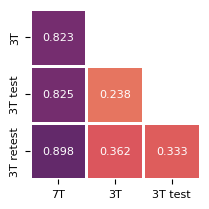

In [0]:
fig, ax = plt.subplots(1, 1, figsize=(3.4, 2.2))

sns.heatmap(
    np.mean(centroid_dist_L, axis=2),
    mask=MASK,
    square=True,
    linewidth=2,
    vmin=0,
    vmax=1,
    cmap="flare",
    annot=True,
    fmt=".3f",
    annot_kws={"size": 8},
    xticklabels=COL_LABELS,
    yticklabels=ROW_LABELS,
    ax=ax,
    cbar=False,
)

# plt.title(f'Procrustus disparity', weight='bold')
plt.yticks(rotation=90, size=8)
plt.xticks(size=8)
fig.tight_layout()
plt.savefig("/localscratch/centroid_distance_L.png", dpi=300, bbox_inches="tight")
plt.show()

In [0]:
plt.close()

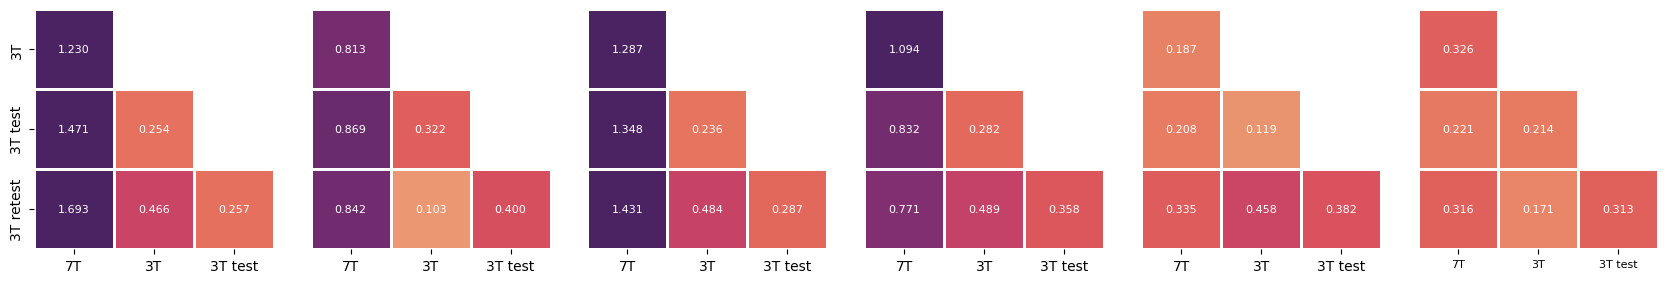

In [0]:
fig, ax = plt.subplots(1, 6, figsize=(3.4 * 5, 2.8))

for idx in range(6):
    sns.heatmap(
        centroid_dist_L[:, :, idx],
        mask=MASK,
        square=True,
        linewidth=2,
        vmin=0,
        vmax=1,
        cmap="flare",
        annot=True,
        fmt=".3f",
        annot_kws={"size": 8},
        xticklabels=COL_LABELS,
        yticklabels=ROW_LABELS,
        ax=ax[idx],
        cbar=False,
    )
    # ax[idx].set_title(f"Cluster {idx+1}")

    if idx > 0:
        ax[idx].yaxis.set_visible(False)
    # ax[idx].xaxis.set_visible(False)

# plt.title(f'Procrustus disparity', weight='bold')
plt.yticks(rotation=90, size=8)
plt.xticks(size=8)
fig.tight_layout()
plt.savefig(
    "/localscratch/centroid_distance_clusters_L.png", dpi=300, bbox_inches="tight"
)
plt.show()

In [ ]:
# Right
centroid_dist_R = np.zeros((3, 3, 6))

for kidx in trange(1, 7):
    centroid_dist_R[0, 0, kidx - 1] = (
        np.linalg.norm(centroid_7Tclusters_R[kidx] - centroid_3Tclusters_R[kidx])
        * VOXEL_SZ
    )
    centroid_dist_R[1, 0, kidx - 1] = (
        np.linalg.norm(centroid_7Tclusters_R[kidx] - centroid_Testclusters_R[kidx])
        * VOXEL_SZ
    )
    centroid_dist_R[2, 0, kidx - 1] = (
        np.linalg.norm(centroid_7Tclusters_R[kidx] - centroid_Retestclusters_R[kidx])
        * VOXEL_SZ
    )
    centroid_dist_R[1, 1, kidx - 1] = (
        np.linalg.norm(centroid_3Tclusters_R[kidx] - centroid_Testclusters_R[kidx])
        * VOXEL_SZ
    )
    centroid_dist_R[2, 1, kidx - 1] = (
        np.linalg.norm(centroid_3Tclusters_R[kidx] - centroid_Retestclusters_R[kidx])
        * VOXEL_SZ
    )
    centroid_dist_R[2, 2, kidx - 1] = (
        np.linalg.norm(centroid_Testclusters_R[kidx] - centroid_Retestclusters_R[kidx])
        * VOXEL_SZ
    )

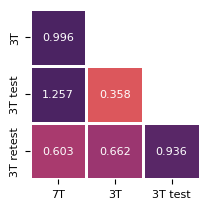

In [0]:
fig, ax = plt.subplots(1, 1, figsize=(3.4, 2.2))

sns.heatmap(
    np.mean(centroid_dist_R, axis=2),
    mask=MASK,
    square=True,
    linewidth=2,
    vmin=0,
    vmax=1,
    cmap="flare",
    annot=True,
    fmt=".3f",
    annot_kws={"size": 8},
    xticklabels=COL_LABELS,
    yticklabels=ROW_LABELS,
    ax=ax,
    cbar=False,
)

plt.yticks(rotation=90, size=8)
plt.xticks(size=8)
fig.tight_layout()
plt.savefig("/localscratch/centroid_distance_R.png", dpi=300, bbox_inches="tight")
plt.show()

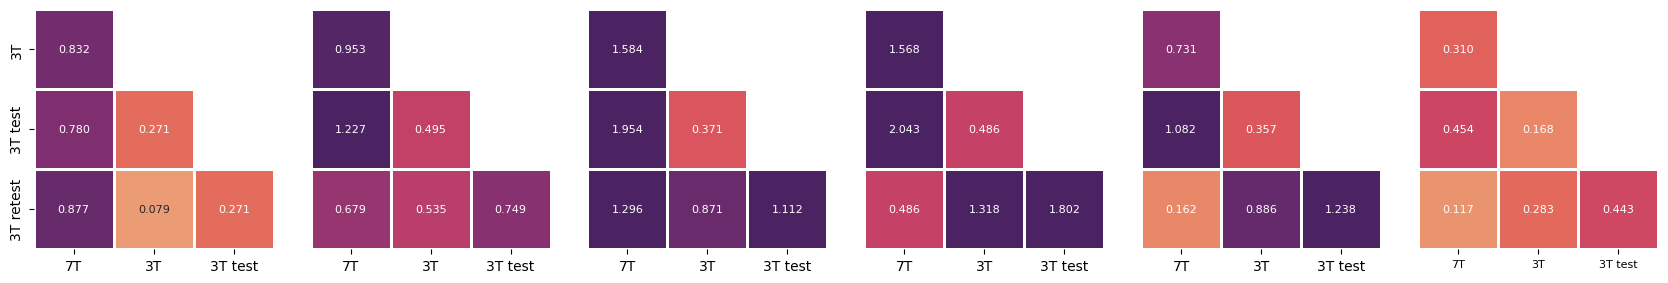

In [0]:
fig, ax = plt.subplots(1, 6, figsize=(3.4 * 5, 2.8))

for idx in range(6):
    sns.heatmap(
        centroid_dist_R[:, :, idx],
        mask=MASK,
        square=True,
        linewidth=2,
        vmin=0,
        vmax=1,
        cmap="flare",
        annot=True,
        fmt=".3f",
        annot_kws={"size": 8},
        xticklabels=COL_LABELS,
        yticklabels=ROW_LABELS,
        ax=ax[idx],
        cbar=False,
    )
    # ax[idx].set_title(f"Cluster {idx+1}")

    if idx > 0:
        ax[idx].yaxis.set_visible(False)

# plt.title(f'Procrustus disparity', weight='bold')
plt.yticks(rotation=90, size=8)
plt.xticks(size=8)
fig.tight_layout()
plt.savefig(
    "/localscratch/centroid_distance_clusters_R.png", dpi=300, bbox_inches="tight"
)
plt.show()

### Dice Overlap

In [ ]:
# Left
dice_L = np.zeros((3, 3, 6))

dsc_7Tv3T, dsc_7TvTest, dsc_7TvRetest = [], [], []
dsc_3TvTest, dsc_3TvRetest = [], []
dsc_TestvRetest = []
for kidx in trange(1, 7):
    bool_7T_L = np.zeros(seed_7Tvol_L.shape)
    bool_7T_L[np.where(seed_7Tvol_L == kidx)] = True
    bool_3T_L = np.zeros(seed_3Tvol_L.shape).astype(bool)
    bool_3T_L[np.where(seed_3Tvol_L == kidx)] = True
    bool_Test_L = np.zeros(seed_Testvol_L.shape).astype(bool)
    bool_Test_L[np.where(seed_Testvol_L == kidx)] = True
    bool_Retest_L = np.zeros(seed_Retestvol_L.shape).astype(bool)
    bool_Retest_L[np.where(seed_Retestvol_L == kidx)] = True

    dsc_7Tv3T = (
        2
        * (np.logical_and(bool_7T_L, bool_3T_L)).sum()
        / (bool_7T_L.sum() + bool_3T_L.sum())
    )
    dsc_7TvTest = (
        2
        * (np.logical_and(bool_7T_L, bool_Test_L)).sum()
        / (bool_7T_L.sum() + bool_Test_L.sum())
    )
    dsc_7TvRetest = (
        2
        * (np.logical_and(bool_7T_L, bool_Retest_L)).sum()
        / (bool_7T_L.sum() + bool_Retest_L.sum())
    )
    dsc_3TvTest = (
        2
        * (np.logical_and(bool_3T_L, bool_Test_L)).sum()
        / (bool_3T_L.sum() + bool_Test_L.sum())
    )
    dsc_3TvRetest = (
        2
        * (np.logical_and(bool_3T_L, bool_Retest_L)).sum()
        / (bool_3T_L.sum() + bool_Retest_L.sum())
    )
    dsc_TestvRetest = (
        2
        * (np.logical_and(bool_Test_L, bool_Retest_L)).sum()
        / (bool_Test_L.sum() + bool_Retest_L.sum())
    )

    dice_L[0, 0, kidx - 1] = dsc_7Tv3T
    dice_L[1, 0, kidx - 1] = dsc_7TvTest
    dice_L[2, 0, kidx - 1] = dsc_7TvRetest
    dice_L[1, 1, kidx - 1] = dsc_3TvTest
    dice_L[2, 1, kidx - 1] = dsc_3TvRetest
    dice_L[2, 2, kidx - 1] = dsc_TestvRetest

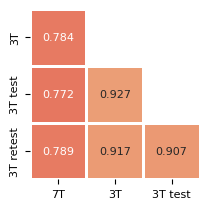

In [0]:
fig, ax = plt.subplots(1, 1, figsize=(3.4, 2.2))

sns.heatmap(
    np.mean(dice_L, axis=2),
    mask=MASK,
    square=True,
    linewidth=2,
    vmin=0,
    vmax=1,
    cmap="flare_r",
    annot=True,
    fmt=".3f",
    annot_kws={"size": 8},
    xticklabels=COL_LABELS,
    yticklabels=ROW_LABELS,
    ax=ax,
    cbar=False,
)

plt.yticks(rotation=90, size=8)
plt.xticks(size=8)
fig.tight_layout()
plt.savefig("/localscratch/dice_L.png", dpi=300, bbox_inches="tight")
plt.show()

In [0]:
plt.close()

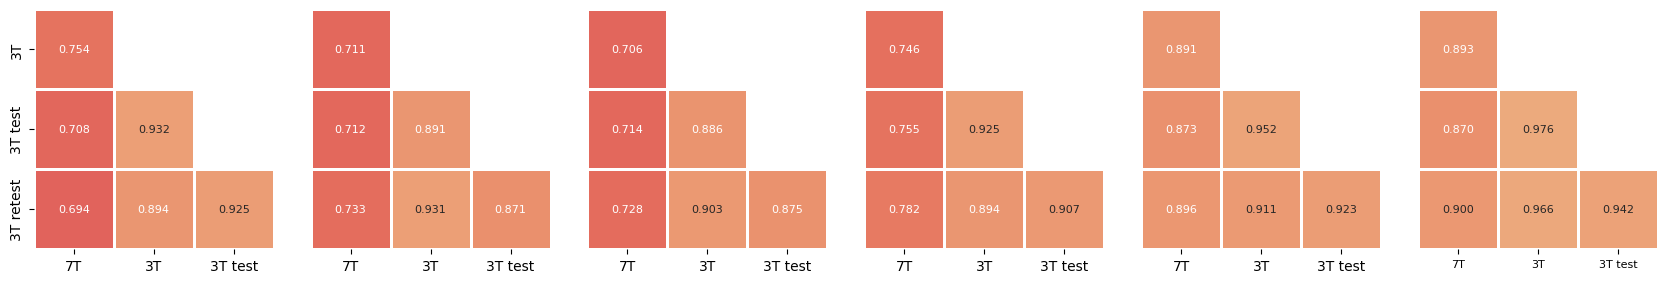

In [0]:
fig, ax = plt.subplots(1, 6, figsize=(3.4 * 5, 2.8))

for idx in range(6):
    sns.heatmap(
        dice_L[:, :, idx],
        mask=MASK,
        square=True,
        linewidth=2,
        vmin=0,
        vmax=1,
        cmap="flare_r",
        annot=True,
        fmt=".3f",
        annot_kws={"size": 8},
        xticklabels=COL_LABELS,
        yticklabels=ROW_LABELS,
        ax=ax[idx],
        cbar=False,
    )
    # ax[idx].set_title(f"Cluster {idx+1}")

    if idx > 0:
        ax[idx].yaxis.set_visible(False)
    # ax[idx].xaxis.set_visible(False)


plt.yticks(rotation=90, size=8)
plt.xticks(size=8)
fig.tight_layout()
plt.savefig("/localscratch/dice_L_clusters.png", dpi=300)
plt.show()

In [ ]:
# Right
dice_R = np.zeros((3, 3, 6))

dsc_7Tv3T, dsc_7TvTest, dsc_7TvRetest = [], [], []
dsc_3TvTest, dsc_3TvRetest = [], []
dsc_TestvRetest = []
for kidx in trange(1, 7):
    bool_7T_R = np.zeros(seed_7Tvol_R.shape)
    bool_7T_R[np.where(seed_7Tvol_R == kidx)] = True
    bool_3T_R = np.zeros(seed_3Tvol_R.shape).astype(bool)
    bool_3T_R[np.where(seed_3Tvol_R == kidx)] = True
    bool_Test_R = np.zeros(seed_Testvol_R.shape).astype(bool)
    bool_Test_R[np.where(seed_Testvol_R == kidx)] = True
    bool_Retest_R = np.zeros(seed_Retestvol_R.shape).astype(bool)
    bool_Retest_R[np.where(seed_Retestvol_R == kidx)] = True

    dsc_7Tv3T = (
        2
        * (np.logical_and(bool_7T_R, bool_3T_R)).sum()
        / (bool_7T_R.sum() + bool_3T_R.sum())
    )
    dsc_7TvTest = (
        2
        * (np.logical_and(bool_7T_R, bool_Test_R)).sum()
        / (bool_7T_R.sum() + bool_Test_R.sum())
    )
    dsc_7TvRetest = (
        2
        * (np.logical_and(bool_7T_R, bool_Retest_R)).sum()
        / (bool_7T_R.sum() + bool_Retest_R.sum())
    )
    dsc_3TvTest = (
        2
        * (np.logical_and(bool_3T_R, bool_Test_R)).sum()
        / (bool_3T_R.sum() + bool_Test_R.sum())
    )
    dsc_3TvRetest = (
        2
        * (np.logical_and(bool_3T_R, bool_Retest_R)).sum()
        / (bool_3T_R.sum() + bool_Retest_R.sum())
    )
    dsc_TestvRetest = (
        2
        * (np.logical_and(bool_Test_R, bool_Retest_R)).sum()
        / (bool_Test_R.sum() + bool_Retest_R.sum())
    )

    dice_R[0, 0, kidx - 1] = dsc_7Tv3T
    dice_R[1, 0, kidx - 1] = dsc_7TvTest
    dice_R[2, 0, kidx - 1] = dsc_7TvRetest
    dice_R[1, 1, kidx - 1] = dsc_3TvTest
    dice_R[2, 1, kidx - 1] = dsc_3TvRetest
    dice_R[2, 2, kidx - 1] = dsc_TestvRetest

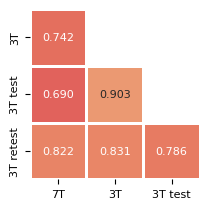

In [0]:
fig, ax = plt.subplots(1, 1, figsize=(3.4, 2.2))

sns.heatmap(
    np.mean(dice_R, axis=2),
    mask=MASK,
    square=True,
    linewidth=2,
    vmin=0,
    vmax=1,
    cmap="flare_r",
    annot=True,
    fmt=".3f",
    annot_kws={"size": 8},
    xticklabels=COL_LABELS,
    yticklabels=ROW_LABELS,
    ax=ax,
    cbar=False,
)

# plt.title(f'Procrustus disparity', weight='bold')
plt.yticks(rotation=90, size=8)
plt.xticks(size=8)
fig.tight_layout()
plt.savefig("/localscratch/dice_R.png", dpi=300)
plt.show()

In [0]:
plt.close()

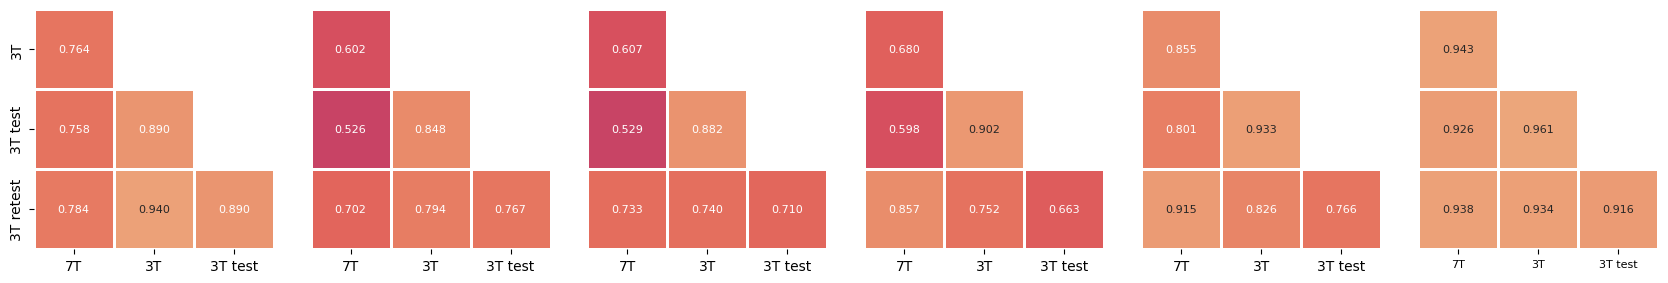

In [0]:
fig, ax = plt.subplots(1, 6, figsize=(3.4 * 5, 2.8))

for idx in range(6):
    sns.heatmap(
        dice_R[:, :, idx],
        mask=MASK,
        square=True,
        linewidth=2,
        vmin=0,
        vmax=1,
        cmap="flare_r",
        annot=True,
        fmt=".3f",
        annot_kws={"size": 8},
        xticklabels=COL_LABELS,
        yticklabels=ROW_LABELS,
        ax=ax[idx],
        cbar=False,
    )
    # ax[idx].set_title(f"Cluster {idx+1}")

    if idx > 0:
        ax[idx].yaxis.set_visible(False)

plt.yticks(rotation=90, size=8)
plt.xticks(size=8)
fig.tight_layout()
plt.savefig("/localscratch/dice_R_clusters.png", dpi=300)
plt.show()

## Installed Packages

_Note: Run this after all used packages have been imported_

In [0]:
import importlib.metadata
import types


def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package not just imported function
            name = val.__name__.split(".")[0]
        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Map imported names to PyPI names
        poorly_named_packages = {"PIL": "Pillow", "sklearn": "scikit-learn"}
        if name in poorly_named_packages:
            name = poorly_named_packages[name]
        yield name


# Get unique imported packages
imports = list(set(get_imports()))

# Cross-check the names of installed packages vs. imported packages
requirements = []
installed_packages = {
    dist.metadata["Name"]: dist.version for dist in importlib.metadata.distributions()
}
for name in imports:
    if name in installed_packages and name != "pip":
        requirements.append((name, installed_packages[name]))

print("Packages used:")
print("==============")
for req_name, req_version in sorted(requirements[::-1], key=lambda x: x[0]):
    print(f"{req_name}=={req_version}")

Packages used:
matplotlib==3.6.2
nibabel==4.0.2
numpy==1.24.4
pandas==1.5.1
seaborn==0.13.0
